# Solutions to GR526 Homework from Day 2: Limits, Convergence, Continuity

Assigned: 1/28/21 in class
Due: 2/4/21, 11:59pm


In [ ]:
# we always start by importing SymPy, so I'll do that for you.  First, upgrade:
!pip install sympy --upgrade

     |████████████████████████████████| 5.9MB 9.7MB/s 
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


In [ ]:
from sympy import *
init_printing(use_latex='mathjax')

## Exercise 1

In Excel, create a table that estimates the rate of change of the following function when $x=2$.

$$f(x)=\frac{\ln(x+5)}{x-1}$$



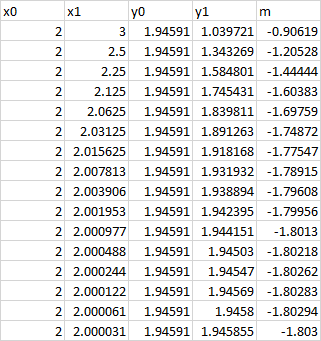

## Exercise 2

In SymPy, write the function $g(x)=\frac{2x^2+7x-4}{2x-1}$.

Evaluating $g(0.5)$ gives a division by zero error, as it should.

We'd like to know whether the function $g(x)$ gets close to any particular value as $x$ gets close to 0.5 from either side.

Evaluate $g(x)$ on at least four $x$ values to the left of 0.5, approaching closer and closer to 0.5.  Then repeat the same process with four values on the right of 0.5.

Does the function seem to be converging to a value as $x$ approaches 0.5?  If so, what value?

Put your answers below where indicated.


In [ ]:
var('x')
g = ( 2*x**2 + 7*x - 4 ) / ( 2*x - 1 )
g

   2          
2⋅x  + 7⋅x - 4
──────────────
   2⋅x - 1    

In [ ]:
g.subs(x,0), g.subs(x,0.4), g.subs(x,0.49), g.subs(x,0.499)

(4, 4.4, 4.49000000000001, 4.49900000000003)

In [ ]:
g.subs(x,1), g.subs(x,0.6), g.subs(x,0.51), g.subs(x,0.501)

(5, 4.6, 4.51000000000001, 4.50100000000008)

It appears to be converging to 4.5.

## Exercise 3

Repeat the previous exercise with $h(x)=\frac{x+9}{2x-1}$, still considering what happens as $x$ approaches 0.5 from each side.

In [ ]:
h = ( x + 9 ) / ( 2*x - 1 )
h

 x + 9 
───────
2⋅x - 1

In [ ]:
h.subs(x,0), h.subs(x,0.4), h.subs(x,0.49), h.subs(x,0.499)

(-9, -47.0, -474.5, -4749.5)

In [ ]:
h.subs(x,1), h.subs(x,0.6), h.subs(x,0.51), h.subs(x,0.501)

(10, 48.0, 475.5, 4750.5)

The function does not appear to be converging to anything.  From the left, it seems to diverge towards $-\infty$, and from the right, it seems to diverge towards $\infty$.

## Exercise 4

Use SymPy to graph both $g$ and $h$ from the previous two Exercises.

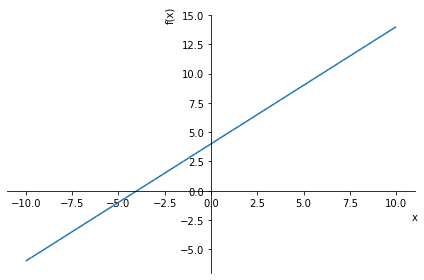

In [ ]:
p = plot( g )

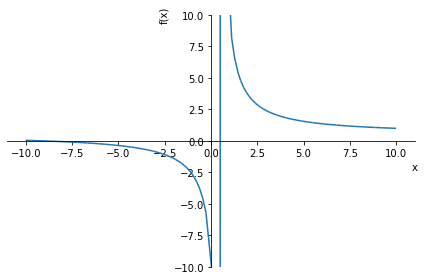

In [ ]:
p = plot( h, ylim=(-10,10) )

## Exercise 5

In the slides for today, there were five examples of ways a limit could diverge (Divergent Example 1 through Divergent Example 5).  For each one, evaluate the corresponding limit in SymPy and by doing so, explain what each piece of output means.  Does SymPy ever make a mistake?

In [ ]:
# Divergent example 1
limit( 1/sin(x)**2, x, 0, "-" )

∞

This is correct.  It means "unbounded above," and is the same answer as we had in the slides.

In [ ]:
# Divergent example 2
limit( (3*x-9)/(2*x-2), x, 1, "+" )

-∞

This is correct.  It means "unbounded below," and is the same answer as we had in the slides.

In [ ]:
# Divergent example 3
limit( log(x+10)/(x+3), x, -3 )

∞

This is sort of correct.  The $\infty$ suggests the function is just unbounded above, but in fact it's actually unbounded in both directions, as we saw in the slides.

In [ ]:
# Divergent example 4
limit( x/abs(3*x), x, 0 )

1/3

This is incorrect.  As we saw in the slides, the limits from the left and right do not agree (one being $-\frac13$ and the other being $\frac13$).  The correct answer is that this limit does not exist.

In [ ]:
# Divergent example 5
limit( cos(1/x), x, 0, "+" )

<-1, 1>

This is SymPy's best way to say, "I can't find a limit here, but if there is one, it's somewhere between -1 and 1."  As we saw in the slides, the function never converges, but wiggles a LOT between -1 and 1, so this answer from SymPy makes sense.

## Exercise 6

Use SymPy to define the function $g(x)=\frac{15x^2+6x-21}{3x-3}$.  State the $x$ value at which this function has a removable discontinuity.  Use SymPy to compute the limit at that $x$ value.  Define a new function in SymPy, $h(x)$, that is equal to $g(x)$ everywhere except at the point of the removable discontinuity; at that point, ensure that $h$ is continuous.

In [ ]:
g = ( 15*x**2 + 6*x - 21 ) / ( 3*x - 3 )
g

    2           
15⋅x  + 6⋅x - 21
────────────────
    3⋅x - 3     

It has a removable discontinuity where the denominator is zero.  Obviously $3x-3=0$ when $x=1$.

We can factor the numerator into $(5x+7)(3x-3)$ and cancel the $3x-3$ with the denominator to find that $g(x)=5x+7$ everywhere except at the problem point $x=1$.

In [ ]:
h = 5*x + 7
h

5⋅x + 7

## Exercise 7

Use SymPy to graph the function

$$f(x)=\begin{cases}-1+\tan x & \text{if }x<0 \\ 1 & \text{if }x\geq 0.\end{cases}$$

Use SymPy to compute the left- and right-hand limits at $x=0$.  State what kind of discontinuity $f$ has.

In [ ]:
f = Piecewise( (-1+tan(x),x<0), (1,x>=0) )
f

⎧tan(x) - 1  for x < 0
⎨                     
⎩    1       otherwise

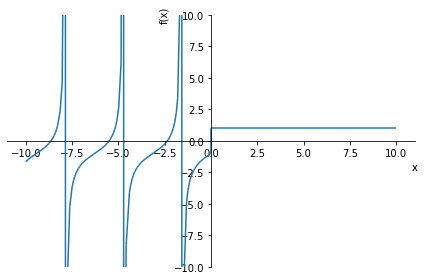

In [ ]:
p = plot( f, ylim=(-10,10) )

In [ ]:
# For some reason, the following gives an error:
# limit( f, x, 0, "-" )
# So instead we can just make things simpler...
# To the left of 0, we know that f is just -1+tan(x).
limit( -1+tan(x), x, 0, "-" )

-1

In [ ]:
# And to the right of 0, f is just 1.
limit( 1, x, 0, "+" )

1

So $f$ has a jump discontinuity.

## Exercise 8

Find a function and an $x$ value for which one of the one-sided limits exists, but the other does not.  Plot your function using SymPy, and include the code and plot below.

In [ ]:
# There are many possible answers here.
# One of them is the third function in Exercise 9, below.
# In code, it would be:
f = Piecewise( (15,x<=0), (1/x,x>0) )
f

⎧15  for x ≤ 0
⎪             
⎨1            
⎪─   otherwise
⎩x            

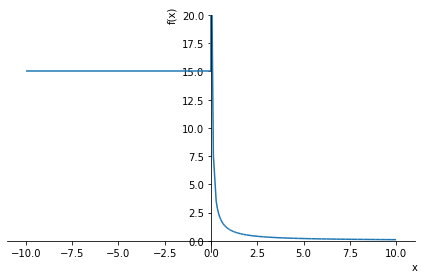

In [ ]:
p = plot( f, ylim=(-1,20) )

## Exercise 9

Show the steps of evaluating each of the following limits algebraically when possible, and using other means when algebra is not possible.  To submit this type of by-hand calculation, just write it on paper, take a photo, send it to your computer, and attach it with the "insert image" button in the toolbar above.

 * $\displaystyle\lim_{x\to\frac{1}{2}}\frac{\sin x+\cos x}{\ln x}$
 * $\displaystyle\lim_{x\to1}(\ln(x^2-1)-\ln(x-1))$
 * If $\displaystyle f(x)=\begin{cases} 15 & \text{if }x\leq0 \\ \frac{1}{x} & \text{if }x>0,\end{cases}$ then what is $\displaystyle\lim_{x\to0^+}f(x)$?

$$
\begin{align}
\lim_{x\to\frac12}\frac{\sin x+\cos x}{\ln x}
&=\frac{\lim_{x\to\frac12}(\sin x+\cos x)}{\lim_{x\to\frac12}\ln x} \\
&=\frac{\lim_{x\to\frac12}\sin x+\lim_{x\to\frac12}\cos x}{\lim_{x\to\frac12}\ln x} \\
&=\frac{\sin\frac12+\cos\frac12}{\ln\frac12}
\end{align}
$$
We can find out a decimal approximation as follows...

In [ ]:
N( (sin(1/2)+cos(1/2))/(log(1/2)) )

-1.95774885702968

$$
\begin{align}
\lim_{x\to1}(\ln(x^2-1)-\ln(x-1))
&=\lim_{x\to1}\ln\frac{x^2-1}{x-1} \\
&=\lim_{x\to1}\ln\frac{(x-1)(x+1)}{x-1} \\
&=\lim_{x\to1}\ln(x+1) = \ln(1+1)=\ln2
\end{align}
$$
And a decimal approximation...

In [ ]:
N( log(2) )

0.693147180559945

The limit of $f(x)$ as $x$ approaches 0 from the right will be the limit of $\frac1x$ as $x$ approaches 0 from the right, because $f(x)=\frac1x$ when $x>0$.  But that function has no limit as $x$ approaches 0 from the right; it diverges there.  (Consider $\frac11$, $\frac1{0.1}$, $\frac1{0.001}$, etc.)  So the answer is that the limit does not exist; the function is unbounded above on the right of 0.